Shape X: (100, 2)
Shape y: (100,)


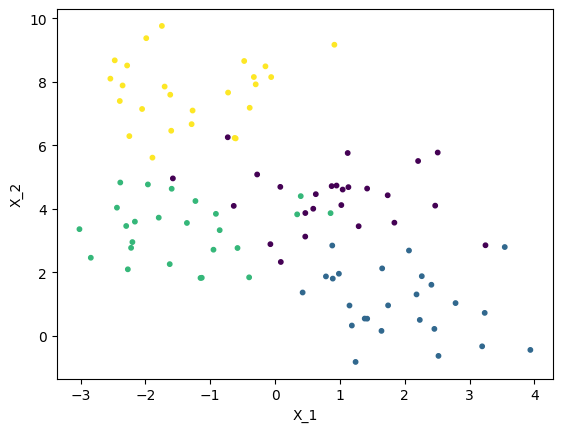

In [58]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=0)
print('Shape X: {}'.format(X.shape))
print('Shape y: {}'.format(y.shape))

plt.scatter(X[:, 0], X[:, 1],s=10, c=y)
plt.xlabel('X_1'); plt.ylabel('X_2')
plt.show()

In [59]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
np.set_printoptions(precision=2)
print("Centroid coordinate: \n{}".format(kmeans.cluster_centers_))
print("Predicted cluster of X: \n{}".format(kmeans.labels_))

Centroid coordinate: 
[[-1.52  3.27]
 [ 2.02  1.03]
 [-1.27  7.64]
 [ 1.05  4.36]]
Predicted cluster of X: 
[3 2 3 3 3 3 0 2 2 2 2 2 2 2 2 1 3 3 0 1 1 2 0 1 3 0 3 3 1 1 1 2 1 1 0 3 2
 1 2 0 3 0 2 0 0 2 1 0 3 0 3 1 0 0 0 2 2 1 1 2 2 1 1 3 1 2 0 0 1 3 2 1 3 2
 3 3 3 0 1 1 1 2 0 0 1 0 1 1 3 3 3 0 0 0 0 2 2 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


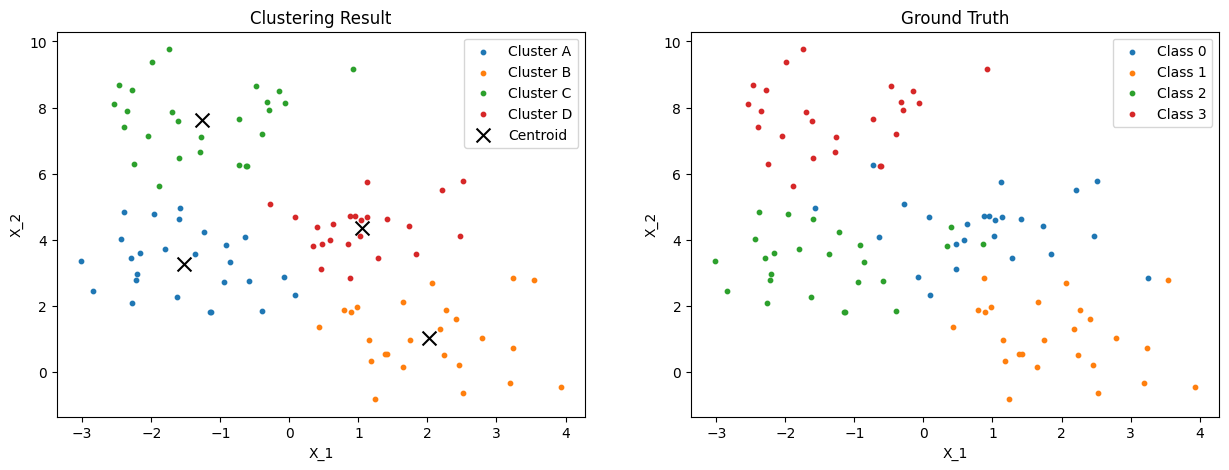

In [60]:
def plot_clustering_result(X, y, kmeans):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    pred = kmeans.predict(X)
    centroids = kmeans.cluster_centers_

    for label in np.unique(y):
      ax[0].scatter(X[pred==label][:, 0], X[pred==label][:, 1],
                    label="Cluster {}".format(chr(65+label)), s=10)
      ax[1].scatter(X[y==label][:, 0], X[y==label][:, 1],
                    label="Class {}".format(label), s=10)
    ax[0].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
    ax[0].set_xlabel('X_1'); ax[0].set_ylabel('X_2')
    ax[1].set_xlabel('X_1'); ax[1].set_ylabel('X_2')
    ax[0].title.set_text('Clustering Result')
    ax[1].title.set_text('Ground Truth')
    ax[0].legend(); ax[1].legend(); plt.show()
plot_clustering_result(X, y, kmeans)


In [61]:
from sklearn.datasets import load_wine
import pandas as pd
data = load_wine(as_frame=True)
df = data['data']
df['class'] = data['target']
df.sample(5, random_state=0)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1


In [62]:
from sklearn.preprocessing import StandardScaler
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

stdsc = StandardScaler()
stdsc.fit(X)
X_std = stdsc.transform(X)
print(X_std.shape)

(178, 13)


In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_std, y)

def plot_clustering_result(X, y, kmeans, lda):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    pred = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    X_lda = lda.transform(X)

    for label in np.unique(y):
      ax[0].scatter(X_lda[pred==label, 0], X_lda[pred==label, 1], label="Cluster {}".format(chr(65+label)), s=10)
      ax[1].scatter(X_lda[y==label, 0], X_lda[y==label, 1],label="Class {}".format(label), s=10)

    centroid_lda = lda.transform(centroids)
    ax[0].scatter(centroid_lda[:, 0], centroid_lda[:, 1],
    c='black', marker='x', s=100, label='Centroid')
    ax[0].set_xlabel('LD_1')
    ax[0].set_ylabel('LD_2')
    ax[1].set_xlabel('LD_1')
    ax[1].set_ylabel('LD_2')
    ax[0].title.set_text('Clustering Result')
    ax[1].title.set_text('Ground Truth')
    ax[0].legend()
    ax[1].legend()
    plt.show()

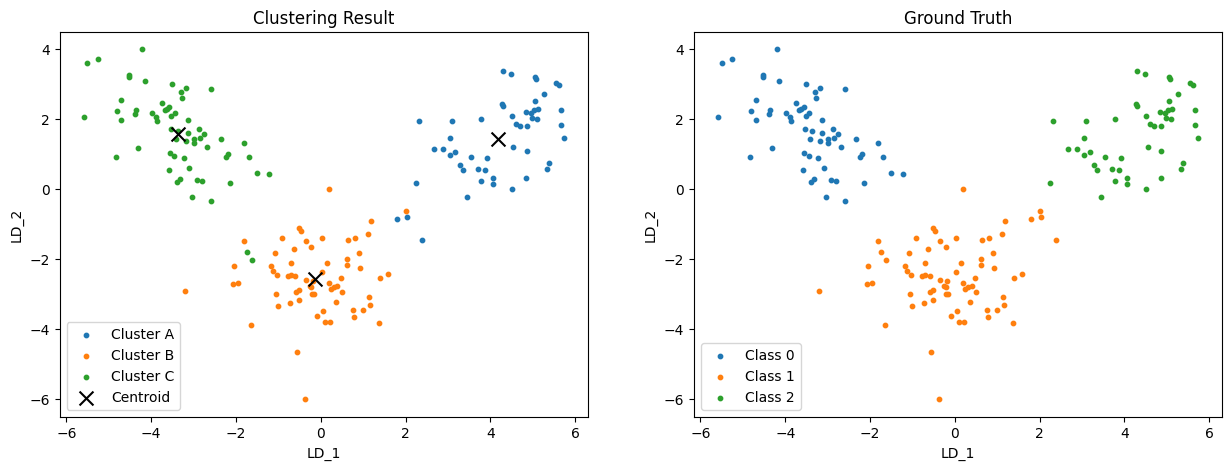

In [66]:
plot_clustering_result(X_std, y, kmeans, lda)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


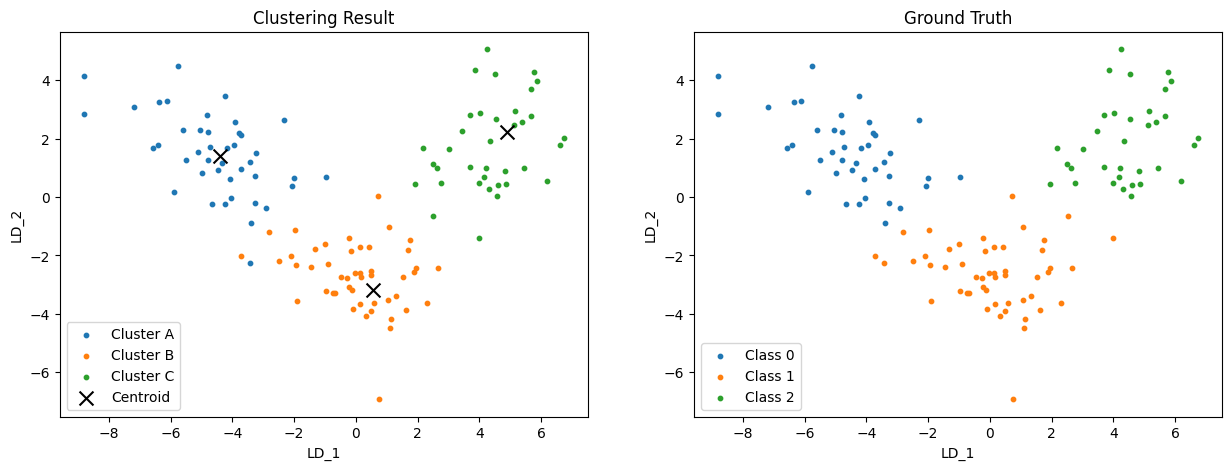

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


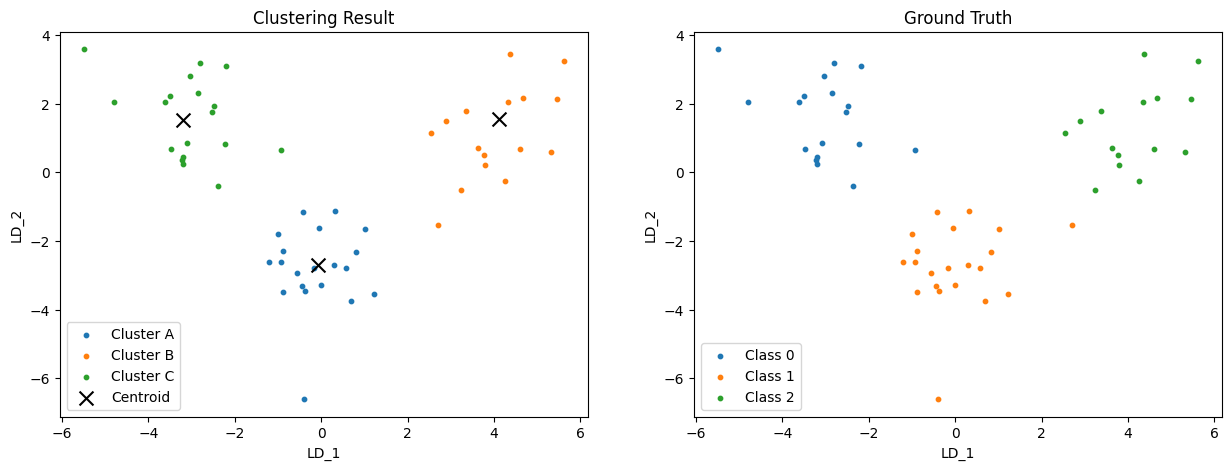

In [70]:
#Exercise16 - test_size = 0.7
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 77, test_size = 0.7, stratify = y)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train_scaled)
cluster_labels = kmeans.predict(X_test_scaled)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

plot_clustering_result(X_test_scaled, y_test, kmeans, lda)

#Exercise16 - test_size = 0.3
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 77, test_size = 0.3, stratify = y)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train_scaled)
cluster_labels = kmeans.predict(X_test_scaled)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

plot_clustering_result(X_test_scaled, y_test, kmeans, lda)